In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy
#pip install -U scikit-fuzzy

In [2]:
#load iris dataset
iris = pd.read_csv('iris.csv')
display(iris)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#get the name and number of classes in the iris dataset
number_class = np.unique(iris['class'])
print(number_class)
print(len(number_class))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


In [4]:
#define the variables that will be passed to the model
variables = iris.iloc[:,0:4]
class_ = iris.iloc[:,4]

In [5]:
# Application of the algorithm defining three clusters (c = 3) and passing the transposed matrix (variables.T). 
# The other parameters are mandatory and are the default parameters indicated in the documentation
c_model = skfuzzy.cmeans(data = variables.T, c = 3, m = 2, error = 0.005, maxiter = 1000, init = None)

In [6]:
#visualization of the centroids of the groups
centroids = c_model[0]
display(centroids)

array([[5.00355987, 3.40305955, 1.48496105, 0.25152282],
       [6.77451451, 3.05225488, 5.64616102, 2.05331762],
       [5.8887001 , 2.76105496, 4.36352477, 1.39707007]])

In [7]:
#Final fuzzy c-partitioned matrix in DataFrame (*Probability of occurrence belongs to each classification)
predictions = c_model[1]
fuzzy_mtx = pd.DataFrame(predictions.T, columns = [str(number_class[0]), str(number_class[1]), str(number_class[2])])
display(fuzzy_mtx)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.996336,0.001163,0.002501
1,0.976945,0.007159,0.015896
2,0.980304,0.006263,0.013433
3,0.968300,0.009837,0.021863
4,0.993927,0.001942,0.004131
...,...,...,...
145,0.011252,0.882613,0.106136
146,0.025831,0.467298,0.506871
147,0.012095,0.831983,0.155923
148,0.021571,0.789665,0.188764


In [8]:
#Create a gradient of color to visualize the different groups
c1 = [0,0,255]
c2 = [255,0,0]
c3 = [255,255,0]
r = np.zeros(len(predictions.T))
g = np.zeros(len(predictions.T))
b = np.zeros(len(predictions.T))

for i in range(len(predictions.T)):
    r[i] = predictions[:,i][0]*c1[0] + predictions[:,i][1]*c2[0] + predictions[:,i][2]*c3[0]
    g[i] = predictions[:,i][0]*c1[1] + predictions[:,i][1]*c2[1] + predictions[:,i][2]*c3[1]
    b[i] = predictions[:,i][0]*c1[2] + predictions[:,i][1]*c2[2] + predictions[:,i][2]*c3[2]

color = pd.DataFrame([r,g,b], index = ['red','green','blue'])
display(color.T)

,red,green,blue
0,0.934327,0.637670,254.065673
1,5.879031,4.053549,249.120969
2,5.022463,3.425504,249.977537
3,8.083408,5.575055,246.916592
4,1.548666,1.053523,253.451334
...,...,...,...
145,252.130849,27.064637,2.869151
146,248.413109,129.252131,6.586891
147,251.915875,39.760246,3.084125
148,249.499268,48.134743,5.500732


In [9]:
df = pd.merge(fuzzy_mtx, color.T, left_index = True, right_index = True)
display(df)

,Iris-setosa,Iris-versicolor,Iris-virginica,red,green,blue
0,0.996336,0.001163,0.002501,0.934327,0.637670,254.065673
1,0.976945,0.007159,0.015896,5.879031,4.053549,249.120969
2,0.980304,0.006263,0.013433,5.022463,3.425504,249.977537
3,0.968300,0.009837,0.021863,8.083408,5.575055,246.916592
4,0.993927,0.001942,0.004131,1.548666,1.053523,253.451334
...,...,...,...,...,...,...
145,0.011252,0.882613,0.106136,252.130849,27.064637,2.869151
146,0.025831,0.467298,0.506871,248.413109,129.252131,6.586891
147,0.012095,0.831983,0.155923,251.915875,39.760246,3.084125
148,0.021571,0.789665,0.188764,249.499268,48.134743,5.500732


In [10]:
index_setosa = iris[class_ == 'Iris-setosa'].index
color_setosa = color[index_setosa].T
color_setosa = np.array(color_setosa)/255

index_versicolor = iris[class_ == 'Iris-versicolor'].index
color_versicolor = color[index_versicolor].T
color_versicolor = np.array(color_versicolor)/255

index_virginica = iris[class_ == 'Iris-virginica'].index
color_virginica = color[index_virginica].T
color_virginica = np.array(color_virginica)/255

Text(0, 0.5, 'Sepal width (cm)')

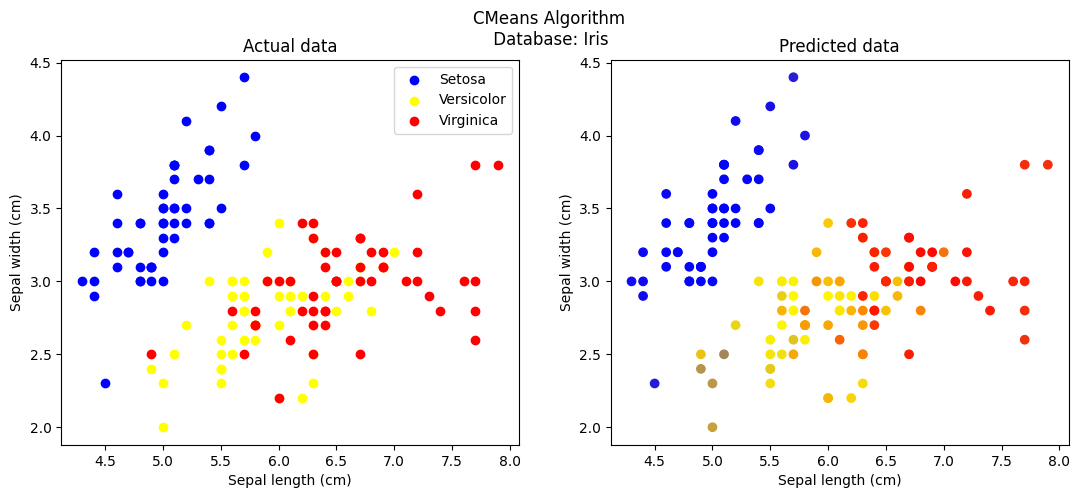

In [11]:
f = plt.figure(0, figsize=(13,5))
plt.suptitle('CMeans Algorithm\n Database: Iris')

f.add_subplot(1,2,1)
plt.title('Actual data') 
plt.scatter(iris['sepal length'][class_ == 'Iris-setosa'], iris['sepal width'][class_ == 'Iris-setosa'], 
            c = 'blue', label = 'Setosa')
plt.scatter(iris['sepal length'][class_ == 'Iris-versicolor'], iris['sepal width'][class_ == 'Iris-versicolor'], 
            c = 'yellow', label = 'Versicolor')
plt.scatter(iris['sepal length'][class_ == 'Iris-virginica'], iris['sepal width'][class_ == 'Iris-virginica'], 
            c = 'red', label = 'Virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()

f.add_subplot(1,2,2)
plt.title('Predicted data') 

plt.scatter(iris['sepal length'][class_ == 'Iris-setosa'], iris['sepal width'][class_ == 'Iris-setosa'], 
            c = color_setosa, label = 'Setosa')
plt.scatter(iris['sepal length'][class_ == 'Iris-versicolor'], iris['sepal width'][class_ == 'Iris-versicolor'], 
            c = color_versicolor, label = 'versicolor')
plt.scatter(iris['sepal length'][class_ == 'Iris-virginica'], iris['sepal width'][class_ == 'Iris-virginica'], 
            c = color_virginica, label = 'virginica')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
